In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
#create a dataframe from a file using pandas
file = '../Resources/Capitals.csv'
# The correct encoding must be used to read the CSV in pandas
weather = pd.read_csv(file, encoding="ISO-8859-1")
weather.reset_index(inplace=True)
weather.columns

Index(['index', 'Country', 'Cities', 'Country Code'], dtype='object')

In [3]:
# set up additional columns to hold information
weather['Temperature'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

#print(response['main']['temp'])
# use iterrows to iterate through pandas dataframe
for index, row in weather.iterrows():

    # iterate thru each row of the file
    city = row['Cities']
    url = base_url + "appid=" + "082ff2cde1d396b2b896b2335daad199" + "&q=" + city +"&units=imperial"

# assemble url and make API request
    response = requests.get(url).json()
   
    #update the dataframe 
    try:
        weather.loc[index, 'Temperature'] = response['main']['temp']
        print(response['main']['temp'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

48.2
Missing field/result... skipping.
78.53
37.04
80.6
Missing field/result... skipping.
71.15
50
52.43
48.49
53.6
36.99
78.28
63.89
31.5
28.4
47.86
82.9
68
25.41
91.18
44.6
66.2
82.4
79.74
43.99
91.4
61.01
80.6
75.2
31.33
73.4
80.6
89.6
54.66
48.4
59
41.77
73.4
73.4
79.37
82
51.58
73.2
Missing field/result... skipping.
39.16
32.05
80.6
29.25
79.81
81.62
57.63
60.39
82.83
43.88
62.99
60.47
33.37
56.64
Missing field/result... skipping.
86
30.76
49.5
75.2
84.2
77
53.6
37.09
82.4
74.03
38.12
66.99
80.6
78.8
80.6
Missing field/result... skipping.
80.2
53.8
38.53
75.2
79.61
55.9
64.4
41.22
Missing field/result... skipping.
48
31.78
44.24
55.04
33.8
63.57
Missing field/result... skipping.
Missing field/result... skipping.
66.2
55.4
77.54
32.52
55.15
38.96
78.8
50.81
44.51
33.58
47.61
53.6
64.4
66.27
78.31
50.03
86
57.42
80.64
71.6
45.72
77.14
49.44
48.61
15.8
51.8
53.6
73.4
Missing field/result... skipping.
63.25
Missing field/result... skipping.
60.8
43.36
67.01
95
93.2
86
42.69
43.14
31.1

In [4]:
weather.head()

,index,Country,Cities,Country Code,Temperature
0,0,Afghanistan,Kabul,AF,48.2
1,1,Albania,Tirana (Tirane),AL,
2,2,Algeria,Algiers,DZ,78.53
3,3,Andorra,Andorra la Vella,AD,37.04
4,4,Angola,Luanda,AO,80.6


In [5]:
weather.to_csv('../Outputs/WeatherbyCity.csv')

In [6]:
happiness = '../Resources/WorldHappinessReport.csv'
happinessReport = pd.read_csv(happiness)

happinessnew = happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()

,country,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [7]:
happinessnew_2017 = happinessnew[happinessnew['year']== 2017]
happinessnew_2017 = happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()


,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [8]:
DF=pd.merge(weather, happinessnew_2017, on="Country", how='inner',suffixes=("","") )
DF['Temperature'] = pd.to_numeric(DF['Temperature'],errors='coerce')
DF.head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,48.20,2017,2.661718
1,1,Albania,Tirana (Tirane),AL,NaN,2017,4.639548
2,2,Algeria,Algiers,DZ,78.53,2017,5.248912
3,6,Argentina,Buenos Aires,AR,71.15,2017,6.039330
4,7,Armenia,Yerevan,AM,50.00,2017,4.287736


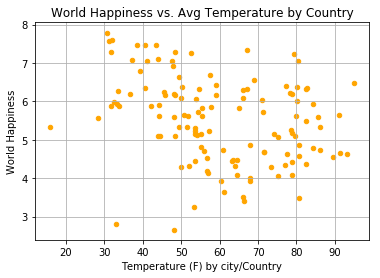

In [29]:
plt.scatter(DF["Temperature"], DF["Life Ladder"], c="orange", marker="o", s=20)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)

#regression
# slope, intercept, r_value, p_value, std_err = linregress(DF["Temperature"], DF["Life Ladder"])

# line = slope*DF["Temperature"]+intercept
# plt.plot(DF["Temperature"], line, 'r', label='DF["Life Ladder"]={:.2f}DF["Temperature"]+{:.2f}'.format(slope,intercept))
# plt.show()         

In [ ]:
#save to graph folder as png
